<a href="https://colab.research.google.com/github/CScheuerman/lab-3-phase-2-EeshanMishra/blob/main/DATA_301_Lab_3_EESHAN_MISHRA%2C_CARLY_SCHEUERMAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Retrieval Practice and Learning

What is the most effective way to learn a subject? Many students focus exclusively on the _encoding_ process---that is, how to get the knowledge into memory in the first place. For example, taking notes is an activity for encoding knowledge.

_Retrieval_, on the other hand, is the process of reconstructing that knowledge from memory. [Karpicke and Blunt](http://science.sciencemag.org/content/331/6018/772) (2011) demonstrated that _retrieval_ is more effective for learning than activites designed to promote effective encoding. They conducted an experiment in which subjects had to learn about sea otters by reading a passage. Subjects were randomly assigned to one of two conditions: some were instructed to create a [concept map](https://en.wikipedia.org/wiki/Concept_map) as they read the passage, while others were instructed to practice retrieval (i.e., read the passage, recall as much as they could, read the text again, and recall again). The two main measurements they recorded were:

1. each subject's score on a follow-up learning test one week later
2. each subject's _prediction_ of how well they would do on that test

In this lab, you will analyze data from a _replication_ of Karpicke and Blunt's experiment, conducted by Buttrick _et al_.
- The data file is here: https://dlsun.github.io/pods/data/KarpickeBlunt2011Replication/data.csv.
- The codebook (explaining what the variables mean) is here: https://dlsun.github.io/pods/data/KarpickeBlunt2011Replication/codebook.csv.

In [2]:
import pandas as pd

df_data = pd.read_csv("https://dlsun.github.io/pods/data/KarpickeBlunt2011Replication/data.csv")
df_data.head()

,ID,Age,Gender,Date.P1,Date.P2,Condition,IC.1,IC.2,Comp.1,Comp.2,PR.1,PR.2,MCS.1,Scorer.1,MCS.2,Scorer.2,MCS.avg,R1CS.1,Scorer.1.1,R1CS.2,Scorer.2.1,R1CS.avg,R2CS.1,Scorer.1.2,R2CS.2,Scorer.2.2,R2CS.avg,TS.1,Scorer.1.3,TS.2,Scorer.2.3,TS.avg,Exc.1,Exc.2,Collection
0,KB1,18,Female,11/21/16,11/28/16,Concept,1,1,1,1,1.0,0.80,0.750,NK,0.670,TT,0.7100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.36,NK,0.42,MS,0.39,0,0,1
1,KB2,18,Male,11/21/16,11/28/16,Concept,1,1,1,1,0.0,0.70,0.400,NK,0.367,TT,0.3835,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.48,MS,0.36,NK,0.42,0,0,1
2,KB3,18,Male,11/21/16,11/28/16,Concept,1,1,1,1,0.0,0.70,0.433,NK,0.550,MS,0.4915,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.08,NK,0.08,MS,0.08,0,0,1
3,KB4,19,Female,11/21/16,11/28/16,Concept,1,1,1,1,0.0,0.70,0.317,NK,0.333,MS,0.3250,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.44,MS,0.42,NK,0.43,0,0,1
4,KB5,19,Female,11/22/16,11/29/16,Concept,1,1,1,1,0.0,0.95,0.683,NK,0.717,MS,0.7000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.26,NK,0.28,MS,0.27,0,0,1


# Question 1

Which group felt like they learned more: the subjects who made concept maps or the ones who practiced retrieval? (Or are they about the same?) Make an appropriate visualization and explain what you see.

_Hint:_ Use the variable `PR.2`, which contains the participants' predictions of how well they would do on a test one week later.

(<matplotlib.axes._subplots.AxesSubplot at 0x7f8963607cd0>, Condition
 Concept      0.690385
 Retrieval    0.576471
 Name: PR.2, dtype: float64)

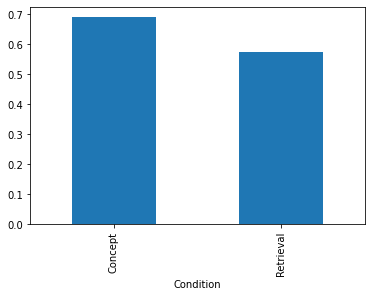

In [3]:
df_data.groupby("Condition")["PR.2"].mean().plot.bar(), df_data.groupby("Condition")["PR.2"].mean()

The people who did the concept maps had a ~11% higher confidence in their test taking abilities.

# Question 2

Which group actually did better on the follow-up learning test one week later? Make an appropriate visualization and explain what you see.

_Hint:_ Don't ask which variable you should use. That is for you to figure out. Read the codebook carefully (consulting the [original paper](http://science.sciencemag.org/content/331/6018/772), if necessary), make an informed decision, and explain your choice.

In [4]:
df_data.groupby("Condition")["TS.1"].mean(), df_data.groupby("Condition")["TS.2"].mean()

(Condition
 Concept      0.470000
 Retrieval    0.624706
 Name: TS.1, dtype: float64, Condition
 Concept      0.467692
 Retrieval    0.608235
 Name: TS.2, dtype: float64)

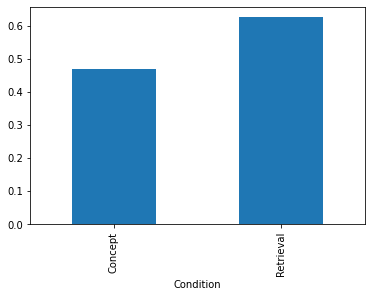

In [5]:
df_data.groupby("Condition")["TS.1"].mean().plot.bar()

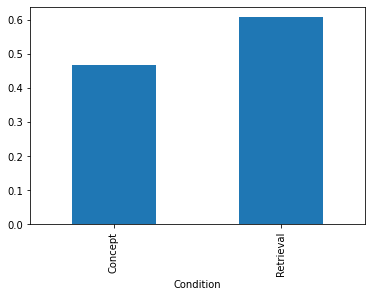

In [6]:
df_data.groupby("Condition")["TS.2"].mean().plot.bar()

The second test scores were higher for Retrieval than for Concept but both of them did marginally worse on the second test.

# Question 3

How good were subjects at predicting how well they would do on the follow-up learning test? Calculate a measure of how well subjects predicted their performance and interpret the value in context. (Optionally, you may want to include a visualization as well.)

In [7]:
percent_error = abs((df_data.groupby("Condition")["PR.2"].mean() - df_data.groupby("Condition")["TS.2"].mean())/df_data.groupby("Condition")["TS.2"].mean())
percent_error

Condition
Concept      0.476151
Retrieval    0.052224
dtype: float64

In [8]:
df_data["TS.2"].corr(df_data["PR.2"])

-0.026314376539902453

The mean percent error for Concept was higher than that of Retrieval, meaning that on average, the two scores for Retrieval were closer than that of Concept. As seen from the two plots, the Retrieval expected and actual values stay around the same area, whereas the Concept values shift to the right, indicating a greater average difference. We can see from the correlation value of -0.02631 that the subjects did not do a good job at all of predicting their scores, in that the higher the confidence was, the lower the resultant score.



Condition
Concept      AxesSubplot(0.125,0.125;0.775x0.755)
Retrieval    AxesSubplot(0.125,0.125;0.775x0.755)
Name: TS.2, dtype: object

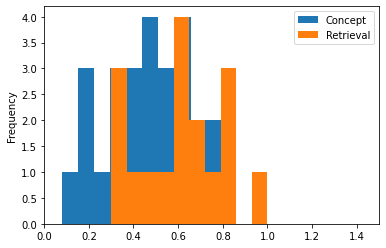

In [9]:
df_data.groupby("Condition")["TS.2"].plot.hist(legend=True, xlim=(0,1.5))

Condition
Concept      AxesSubplot(0.125,0.125;0.775x0.755)
Retrieval    AxesSubplot(0.125,0.125;0.775x0.755)
Name: PR.2, dtype: object

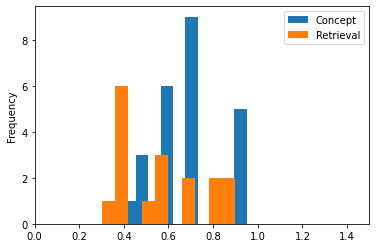

In [10]:
df_data.groupby("Condition")["PR.2"].plot.hist(legend=True, xlim=(0, 1.5))

## Submission Instructions

- Copy this notebook to your own Drive, if you have not already.
- Restart this notebook and run the cells from beginning to end. 
  - Go to Runtime > Restart and Run All.
- Rename this notebook by clicking on "DATA 301 Lab 3 - YOUR NAMES HERE" at the very top of this page. Replace "YOUR NAMES HERE" with the first and last names of you (and your partner for Phase 2).
- Get the link to your notebook:
  - Click on "Share" at the top-right. 
  - Change the settings to "Anyone with the link can view". 
  - Copy the sharing link into Canvas.